In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import time

In [ ]:
# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step


In [ ]:
#DNN model
def create_model():
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Train model without Early Stopping
model = create_model()
start_time = time.time()
history_no_es = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, verbose=1)
time_no_es = time.time() - start_time

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.1667 - loss: 110.4007 - val_accuracy: 0.2470 - val_loss: 3.5174
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.2561 - loss: 3.5456 - val_accuracy: 0.2895 - val_loss: 2.3031
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3072 - loss: 2.2500 - val_accuracy: 0.2816 - val_loss: 2.2134
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3289 - loss: 2.0573 - val_accuracy: 0.3175 - val_loss: 2.0515
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3499 - loss: 1.9133 - val_accuracy: 0.3216 - val_loss: 1.9472
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3597 - loss: 1.8516 - val_accuracy: 0.3489 - val_loss: 1.8582
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3772 - loss: 1.7859 - val_accuracy: 0.3654 - val_loss: 1.7806
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.3844 - loss: 1.7552 - val_a

In [ ]:
#train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_es = create_model()
start_time_es = time.time()
history_es = model_es.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, verbose=1, callbacks=[early_stopping])
time_es = time.time() - start_time_es

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.1685 - loss: 99.7915 - val_accuracy: 0.1690 - val_loss: 7.4917
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.2535 - loss: 3.8725 - val_accuracy: 0.2828 - val_loss: 2.4957
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3042 - loss: 2.2491 - val_accuracy: 0.3187 - val_loss: 2.0725
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3178 - loss: 2.0810 - val_accuracy: 0.3289 - val_loss: 2.0097
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3423 - loss: 1.9443 - val_accuracy: 0.3530 - val_loss: 1.8604
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.3628 - loss: 1.8489 - val_accuracy: 0.3591 - val_loss: 1.8856
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.3766 - loss: 1.7865 - val_accuracy: 0.3579 - val_loss: 1.8543
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.3854 - loss: 1.7493 - val_ac

In [ ]:
# Evaluating
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
test_loss_es, test_acc_es = model_es.evaluate(x_test, y_test, verbose=0)

print(f"Without Early Stopping -> Time: {time_no_es:.2f}s, Accuracy: {test_acc:.4f}")
print(f"With Early Stopping -> Time: {time_es:.2f}s, Accuracy: {test_acc_es:.4f}")

Without Early Stopping -> Time: 388.47s, Accuracy: 0.4759
With Early Stopping -> Time: 191.09s, Accuracy: 0.4126


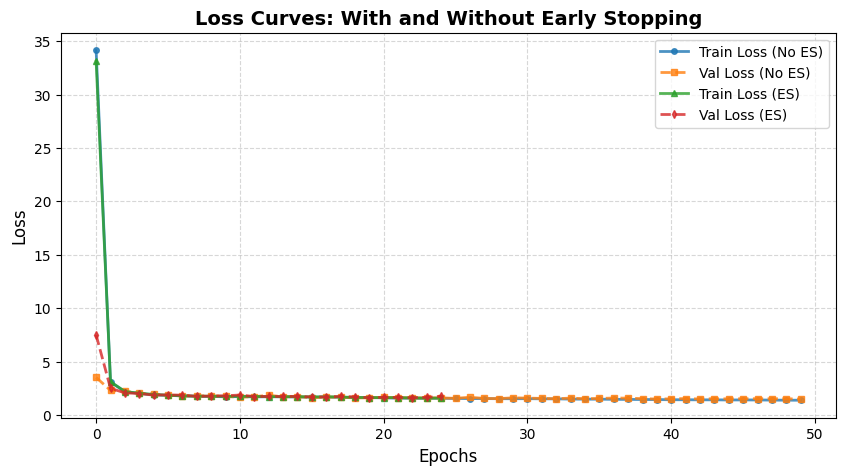

In [ ]:
plt.figure(figsize=(10, 5))

# Loss without Early Stopping
plt.plot(history_no_es.history['loss'], label='Train Loss (No ES)', linestyle='-', marker='o', linewidth=2, markersize=4, alpha=0.8)
plt.plot(history_no_es.history['val_loss'], label='Val Loss (No ES)', linestyle='--', marker='s', linewidth=2, markersize=4, alpha=0.8)

# Loss with Early Stopping
plt.plot(history_es.history['loss'], label='Train Loss (ES)', linestyle='-', marker='^', linewidth=2, markersize=4, alpha=0.8)
plt.plot(history_es.history['val_loss'], label='Val Loss (ES)', linestyle='--', marker='d', linewidth=2, markersize=4, alpha=0.8)

plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Loss Curves: With and Without Early Stopping", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()




* Early Stopping helped reduce unnecessary training while achieving similar performance.
* No significant overfitting, as validation loss remains stable.
* Both models converge to a similar loss value, meaning training longer (without ES) didn't provide major benefits.
